In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Domain
L = 1.0
nx = 51
nt = 1000
sigma = 0.5 #must be less than or equal to 0.5 to maintain stability.
alpha = 1.22*10**-3
x = numpy.linspace(0.0,L,nx)
dx = x[1]-x[0]
dt = sigma *dx**2/alpha

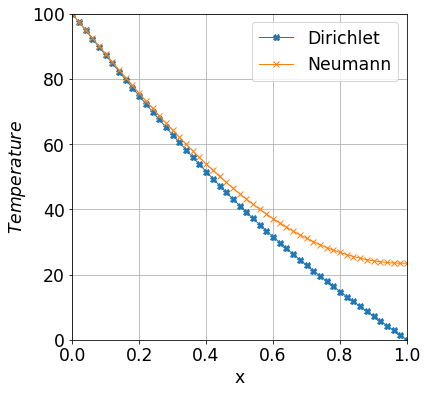

In [3]:
T0 = numpy.zeros(nx)
T0[0] = 100.0
T0[-1]= 0.0

#Dirichlet Boundary Condition
def ftcp(T0,sigma,nt):
    T = T0.copy()
    for i in range(1,nt):
        T[1:-1] = T[1:-1] + sigma*(T[:-2]-2*T[1:-1]+T[2:])        
    return T

Td = numpy.zeros(nx)
Td=ftcp(T0,sigma,nt)

#NeumannCondition

def ftcp(T0,sigma,dx,nt,q=0.0):
    T = T0.copy()
    for i in range(1,nt):
        T[1:-1] = T[1:-1] + sigma*(T[:-2]-2*T[1:-1]+T[2:])
        T[0] = T0[0]
        T[-1]= T[-2]+q*dx        
    return T

Tn=numpy.zeros(nx)
Tn=ftcp(T0,sigma,dx,nt)

def plot_figure(x,Td,Tn):
    params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
    pyplot.rcParams.update(params)
    pyplot.xlabel('x')
    pyplot.ylabel('$Temperature$')
    pyplot.grid()
    pyplot.plot(x, Td, label='Dirichlet', linewidth=1.0, marker = 'X')
    pyplot.plot(x, Tn, label='Neumann', linewidth=1.0, marker = 'x')
    pyplot.legend()
    pyplot.xlim(0.0,1.0)
    pyplot.ylim(0.0,100.0)
    
plot_figure(x,Td,Tn)

In [ ]:
#backward in time central in space
def btcs():
    
    